In [56]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error,mean_squared_log_error,mean_absolute_error,explained_variance_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

In [36]:
db_v4 = 'https://drive.google.com/file/d/19ERs5bmAdxEfgUmTxgfIBhUoT6xPHzZy/view?usp=sharing'
db_v5 = 'https://drive.google.com/file/d/1X4YJP5fjfyk8f_TjSGBdIsTdv8MCCgY7/view?usp=sharing'
db_v7 = 'https://drive.google.com/file/d/1uc3blY0d7dhgjLialENZzwTgy_qChZQk/view?usp=sharing'
db_v8 = 'https://drive.google.com/file/d/1Ffbhy12m4JG9REEdSQwwewIFE0KUiEX3/view?usp=sharing'
fname1 = db_v8
fname1 ='https://drive.google.com/uc?id=' + fname1.split('/')[-2]
dataset = pd.read_csv(fname1)

In [3]:
dataset['Neighborhoods - Analysis Boundaries_f'] = pd.factorize(dataset['Neighborhoods - Analysis Boundaries'])[0]
dataset['Neighborhoods - Analysis Boundaries_f']

0        0
1        1
2        2
3        3
4        3
5        3
6        4
7        1
8        5
9        6
10       7
11       3
12       8
13       9
14       9
15      10
16      11
17       6
18       3
19       5
20       2
21      12
22      13
23       3
24       5
25       3
26      14
27      14
28      15
29      15
30      15
31      15
32      15
33      15
34      15
35      15
36      15
37      15
38      15
39       8
40      16
41       5
42      12
43      16
44      16
45       9
46       9
47       9
48       9
49       5
50       2
51       6
52       5
53      17
54      17
55      17
56       3
57       3
58       3
59      18
60      18
61      18
62      18
63      18
64      18
65      18
66      18
67      18
68      18
69      18
70      18
71      18
72      18
73      18
74      18
75      18
76      18
77      18
78      18
79      14
80       0
81       0
82       2
83       8
84       2
85      18
86      18
87      19
88       5
89       5
90       6

In [6]:
dataset.columns


Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration_construction_days',
       'Process_time_days', 'Year', 'Est_Cost_Infl', 'Rev_Cost_Infl',
       'Est_Cost_Infl_log10', 'Est_Cost_Infl_loge', 'lat_lon', 'address.1',
       'geometry', 'point', 'polygon', 'area_m2',
       'Number of Proposed Stories_', 'Number of Proposed Stories

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           6575 non-null   object 
 1   Permit Type                             6575 non-null   int64  
 2   Permit Type Definition                  6575 non-null   object 
 3   Permit Creation Date                    6575 non-null   object 
 4   Block                                   6575 non-null   object 
 5   Lot                                     6575 non-null   object 
 6   Street Number                           6575 non-null   int64  
 7   Street Name                             6575 non-null   object 
 8   Street Suffix                           6575 non-null   object 
 9   Description                             5587 non-null   object 
 10  Current Status                          6575 non-null   obje

In [6]:
dataset['Zipcode_'] = dataset['Zipcode_'].replace('Other', '94000').astype(int)

<AxesSubplot:>

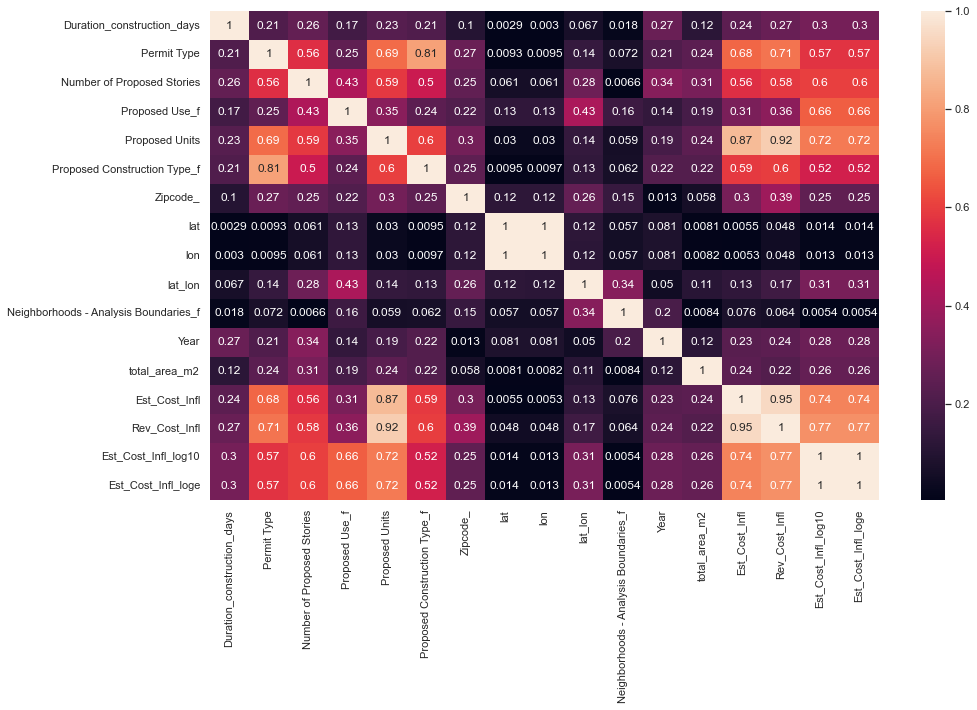

In [7]:
sns.set()

dataset_filtered = dataset[[
    'Duration_construction_days',
    "Permit Type",
    "Number of Proposed Stories",
    "Proposed Use_f",
    "Proposed Units",
    'Proposed Construction Type_f', 
    "Neighborhoods - Analysis Boundaries", 
    "Zipcode_",
    'lat',
    'lon',
    'lat_lon',
    'Neighborhoods - Analysis Boundaries_f',
    "Year",
    'address.1',
    'total_area_m2',
    'Est_Cost_Infl',
    'Rev_Cost_Infl',
    'Est_Cost_Infl_log10',
    'Est_Cost_Infl_loge'
    ]]

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(dataset_filtered.corr().abs(), annot=True, ax=ax)

In [8]:
# dataset["Proposed Use"].value_counts()
# We only keep 1 family dwelling, 2 family dwelling and appartments because it's represent 90% of the dataset and this improve prediction
#idx = np.where((dataset["Proposed Use"]=="1 family dwelling") | (dataset["Proposed Use"]=="2 family dwelling") | (dataset["Proposed Use"]=="apartments"))
#dataset = dataset.loc[idx]

In [9]:
dataset['Neighborhoods - Analysis Boundaries_f'] = pd.factorize(dataset['Neighborhoods - Analysis Boundaries'])[0]
dataset['Neighborhoods - Analysis Boundaries_f']

0        0
1        1
2        2
3        3
4        3
5        3
6        4
7        1
8        5
9        6
10       7
11       3
12       8
13       9
14       9
15      10
16      11
17       6
18       3
19       5
20       2
21      12
22      13
23       3
24       5
25       3
26      14
27      14
28      15
29      15
30      15
31      15
32      15
33      15
34      15
35      15
36      15
37      15
38      15
39       8
40      16
41       5
42      12
43      16
44      16
45       9
46       9
47       9
48       9
49       5
50       2
51       6
52       5
53      17
54      17
55      17
56       3
57       3
58       3
59      18
60      18
61      18
62      18
63      18
64      18
65      18
66      18
67      18
68      18
69      18
70      18
71      18
72      18
73      18
74      18
75      18
76      18
77      18
78      18
79      14
80       0
81       0
82       2
83       8
84       2
85      18
86      18
87      19
88       5
89       5
90       6

In [10]:
#dataset[['Neighborhoods - Analysis Boundaries', 'Neighborhoods - Analysis Boundaries_f']]

In [11]:
dataset["Proposed Use_f"]= pd.factorize(dataset["Proposed Use"])[0]
dataset["Proposed Use_f"]

0       0
1       0
2       0
3       1
4       1
5       1
6       0
7       1
8       2
9       2
10      0
11      1
12      2
13      2
14      2
15      0
16      0
17      0
18      1
19      1
20      0
21      0
22      0
23      1
24      0
25      1
26      2
27      2
28      0
29      1
30      1
31      0
32      1
33      0
34      0
35      0
36      1
37      1
38      0
39      2
40      2
41      1
42      0
43      2
44      2
45      0
46      0
47      0
48      0
49      1
50      0
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      2
60      2
61      2
62      2
63      2
64      2
65      2
66      2
67      2
68      2
69      2
70      2
71      2
72      2
73      2
74      2
75      2
76      2
77      2
78      2
79      0
80      1
81      1
82      1
83      2
84      0
85      2
86      2
87      0
88      0
89      1
90      2
91      1
92      0
93      1
94      1
95      1
96      0
97      1
98      2
99      2


In [7]:
dataset.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Proposed Use,Proposed Units,Plansets,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,address,lat,lon,Duration_construction_days,Process_time_days,Year,Est_Cost_Infl,Rev_Cost_Infl,Est_Cost_Infl_log10,Est_Cost_Infl_loge,lat_lon,address.1,geometry,point,polygon,area_m2,Number of Proposed Stories_,Number of Proposed Stories_cat,Zipcode_,Proposed Construction Type_,Number of Proposed Stories_cat_f,Proposed Use_f,Proposed Construction Type_f,Number of Proposed Stories_bct,Number of Proposed Stories_cat_f_bct,Proposed Construction Type_f_bct,Proposed Units_bct,Proposed Use_f_bct,Duration_construction_days_bct,total_area_m2,cost_per_m2
0,9111378,2,new construction wood frame,1991-06-28,3566,037,3686,17th,St,erect a four story three unit residential bldg,complete,1993-09-20,1991-06-28,1992-11-30,1993-09-20,NaN,4.0,1994-11-30,250000.0,350000.0,apartments,3.0,2.0,5,wood frame (5),NaN,8.0,Castro/Upper Market,94114,POINT (-122.42798037718552 37.76316610254898),342335281878,3686 17th St,-122.427980,37.763166,294.0,521.0,1991,4.973752e+05,696325.256975,5.696684,13.117100,-4623.268159,"3686 17th St, San Francisco, CA 94114",NaN,POINT (-122.42798037718552 37.76316610254898),"POLYGON ((6004384.44156398 2106033.407080037, ...",147.915331,4.0,3-4 stories,94114,5,0,0,0,1.746189,0.0,0.0,1.486984,0.000000,7.659654,591.661324,840.641704
1,8707430,2,new construction wood frame,1987-05-29,1733,046,1254,18th,Av,NaN,complete,1988-10-07,1987-05-29,1988-01-20,1988-10-07,NaN,3.0,1990-01-20,394000.0,NaN,apartments,4.0,2.0,5,wood frame (5),NaN,4.0,Inner Sunset,94122,POINT (-122.47578567375196 37.76447248121622),161612112132,1254 18th Av,-122.475786,37.764472,261.0,236.0,1987,9.398079e+05,NaN,5.973039,13.753431,-4625.233438,"1254 18th Av, San Francisco, CA 94122","{""type"": ""Polygon"", ""coordinates"": [[[-122.476...",POINT (-122.47578567375196 37.76447248121622),"POLYGON ((5990594.490913103 2106871.242348627,...",253.922359,3.0,3-4 stories,94122,5,0,0,0,1.486984,0.0,0.0,1.746189,0.000000,7.451394,761.767077,1233.720846
2,7912377,2,new construction wood frame,1979-12-01,1361,064,3900,California,St,NaN,complete,1984-02-29,1979-12-01,1983-01-24,1984-02-29,NaN,3.0,1985-01-24,790000.0,NaN,apartments,8.0,2.0,5,wood frame (5),NaN,2.0,Inner Richmond,94118,POINT (-122.45952470081986 37.7858592269433),86903496726,3900 California St,-122.459525,37.785859,401.0,1150.0,1979,2.948572e+06,NaN,6.469612,14.896831,-4627.238361,"3900 California St, San Francisco, CA 94118","{""type"": ""Polygon"", ""coordinates"": [[[-122.459...",POINT (-122.45952470081986 37.7858592269433),POLYGON ((5995398.966155565 2114500.1454920806...,504.669823,3.0,3-4 stories,94118,5,0,0,0,1.486984,0.0,0.0,2.457309,0.000000,8.214724,1514.009469,1947.525221
3,8010466,2,new construction wood frame,1980-11-25,4159,074,1084,De Haro,St,NaN,complete,1985-07-05,1980-11-25,1984-08-06,1985-07-05,NaN,3.0,1985-08-06,210500.0,NaN,2 family dwelling,2.0,4.0,5,wood frame (5),NaN,10.0,Potrero Hill,94107,POINT (-122.40107686660524 37.7560791545319),1490171598,1084 De Haro St,-122.401077,37.756079,333.0,1350.0,1980,6.922231e+05,NaN,5.840246,13.447664,-4621.384747,"1084 De Haro St, San Francisco, CA 94107",NaN,POINT (-122.40107686660524 37.7560791545319),POLYGON ((6012157.402672291 2103366.9430118585...,167.842843,3.0,3-4 stories,94107,5,0,1,0,1.486984,0.0,0.0,1.161232,0.717735,7.880294,503.528529,1374.744586
4,8010466,2,new construction wood frame,1980-11-25,4159,073,1082,De Haro,St,NaN,complete,1985-07-05,1980-11-25,1984-08-06,1985-07-05,NaN,3.0,1985-08-06,210500.0,NaN,2 family dwelling,2.0,4.0,5,

In [38]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list =[
    'Permit Type',
    'Proposed Units',
    'Proposed Use_f',
    'Duration_construction_days',
    'Number of Proposed Stories_',
    'Year',
    'Proposed Construction Type_f',
    'lat_lon'
]

target_variable = "Est_Cost_Infl_log10"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    5.696684
1    5.973039
2    6.469612
3    5.840246
4    5.840246
Name: Est_Cost_Infl_log10, dtype: float64

X :
   Permit Type  Proposed Units  Proposed Use_f  Duration_construction_days  \
0            2             3.0               0                       294.0   
1            2             4.0               0                       261.0   
2            2             8.0               0                       401.0   
3            2             2.0               1                       333.0   
4            2             2.0               1                       333.0   

   Number of Proposed Stories_  Year  Proposed Construction Type_f  \
0                          4.0  1991                             0   
1                          3.0  1987                             0   
2                          3.0  1979                             0   
3                          3.0  1980                             0   
4             

In [39]:
X.head()

,Permit Type,Proposed Units,Proposed Use_f,Duration_construction_days,Number of Proposed Stories_,Year,Proposed Construction Type_f,lat_lon
0,2,3.0,0,294.0,4.0,1991,0,-4623.268159
1,2,4.0,0,261.0,3.0,1987,0,-4625.233438
2,2,8.0,0,401.0,3.0,1979,0,-4627.238361
3,2,2.0,1,333.0,3.0,1980,0,-4621.384747
4,2,2.0,1,333.0,3.0,1980,0,-4621.384747


In [40]:
#Manually selecting type of features
numeric_features=[
    'Permit Type',
    'Proposed Units',
    'Proposed Use_f',
	'Duration_construction_days',
    'Number of Proposed Stories_',
    'Year',
	'Proposed Construction Type_f',
    'lat_lon'
    ]
categorical_features=[] 

In [41]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

# Test pipeline
print("Preprocessing X_test...")
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_train...

...Done!
[[-0.65786955 -0.29038835 -0.73443937  0.49943832  0.93761135  1.08147374
  -0.21058111 -0.4430332   0.21625487 -0.46635782]
 [-0.6275874  -0.24227082 -0.03478328 -0.87797527 -0.69856192 -0.08230528
  -0.21058111  0.2827757   0.21625487 -0.07607803]
 [ 0.11811062  0.09455185  0.66487281  0.92325789 -1.63461302 -1.2460843
  -0.21058111  0.21019481  0.21625487 -0.43950711]
 [-0.02951488 -0.29038835 -0.73443937 -0.56011059  1.03033759  1.08147374
  -0.21058111 -0.4430332   0.21625487 -0.63465029]
 [ 0.00265991 -0.29038835 -0.03478328 -0.56011059  0.27604726  1.08147374
  -0.21058111  0.93600371  0.21625487  0.09656771]]

Preprocessing X_test...

...Done!
[[-0.45914293 -0.29038835 -0.03478328  0.28752854  1.44836085  1.08147374
  -0.21058111  0.42793748  0.21625487 -0.54837014]
 [-0.33990695 -0.24227082 -0.03478328 -0.56011059 -0.87929061 -0.08230528
  -0.21058111 -1.16884211  0.21625487 -0.36044652]
 [ 0.00833781 -0.04980072  0.66487281  1.02921278  0.08

In [48]:
###### Training with hyperparameters optimization #######

# Perform grid search
print("Grid search...")
regressor = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [16, 25, 100],
    'min_samples_leaf': [1, 2 , 10],
    'min_samples_split': [4, 8, 12],
    'n_estimators': [100, 140, 200]
}

gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best validation accuracy :  0.9085831130323362


In [51]:
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Best hyperparameters :  {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best validation accuracy :  0.9085831130323362


In [28]:
###### Performances ######

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()


Predictions on training set...


NameError: name 'gridsearch' is not defined

In [29]:
# fit a random forest regressor

randomForestRegressor = RandomForestRegressor(n_estimators=200, max_depth=100, min_samples_leaf=1, min_samples_split=4, random_state=0)
randomForestRegressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, min_samples_split=4, n_estimators=200,
                      random_state=0)

In [53]:
# computing RMLSE score for a dumb model that systematically predict the mean target value

mean_value_vector = np.full(len(Y_test), Y_test.mean())
mean_squared_error(y_true = Y_test, y_pred= mean_value_vector ,squared = False)

0.4285822226639252

In [30]:
# with our predictions

y_train_pred = randomForestRegressor.predict(X_train)
y_test_pred = randomForestRegressor.predict(X_test)

mean_squared_error(y_true = Y_test, y_pred= y_test_pred ,squared = False)


0.12192249888955092

Text(0.5, 0, 'Random Forest Feature Importance')

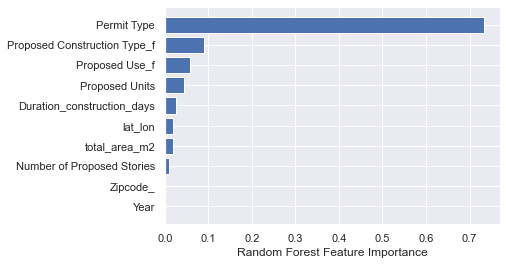

In [31]:
# plot feature importance

randomForestRegressor.feature_importances_
sorted_idx = randomForestRegressor.feature_importances_.argsort()
randomForestRegressor.feature_importances_[sorted_idx]
plt.barh(X.columns[sorted_idx], randomForestRegressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

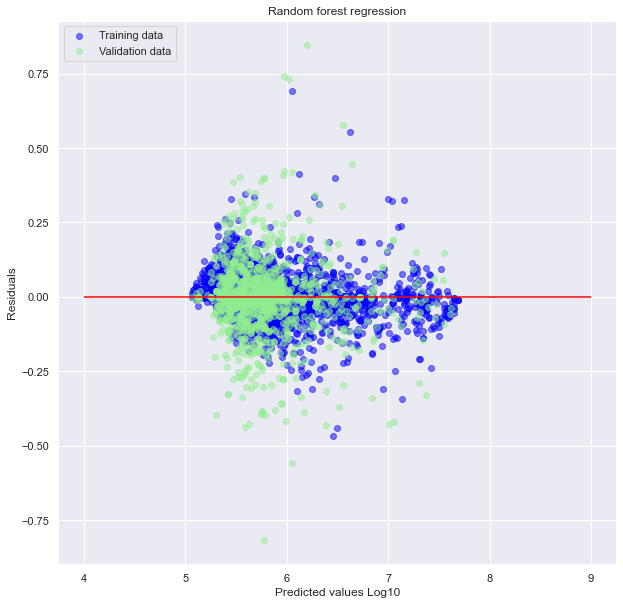

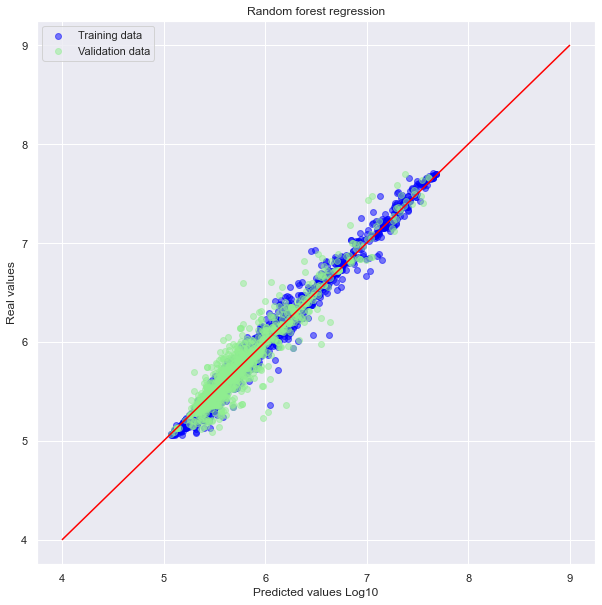

In [22]:
# Plot residuals
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, y_train_pred - Y_train, c = "blue", marker = "o", alpha=0.5, label = "Training data")
plt.scatter(y_test_pred, y_test_pred - Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 4, xmax = 9, color = "red")
plt.show()

# Plot predictions
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "o", alpha=0.5,  label = "Training data")
plt.scatter(y_test_pred, Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([4, 9], [4, 9], c = "red")
plt.show()

In [47]:
###### Training with hyperparameters optimization #######

# Perform grid search
print("Grid search...")
regressor = xgb.XGBRegressor()

# Grid of values to be tested
params = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'colsample_bytree': 0.8, 'max_depth': 25, 'n_estimators': 400, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.7}
Best validation accuracy :  0.9064001962272465


In [48]:
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Best hyperparameters :  {'colsample_bytree': 0.8, 'max_depth': 25, 'n_estimators': 400, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.7}
Best validation accuracy :  0.9064001962272465


In [63]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0.4, 
                             learning_rate=0.1, max_depth=25, 
                             min_child_weight=1.5, n_estimators=400,
                             reg_alpha=1.2, reg_lambda=1.1,
                             subsample=0.7, silent=1,
                             random_state =0, nthread = -1)
model_xgb.fit(X_train, Y_train)

[11:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1.5,
             missing=nan, monotone_constraints='()', n_estimators=400,
             n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=1.2, ...)

In [64]:
# with our predictions

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

mean_squared_error(y_true = Y_test, y_pred= y_test_pred, squared = False)

0.14298490748557094

Text(0.5, 0, 'XGBoost Feature Importance')

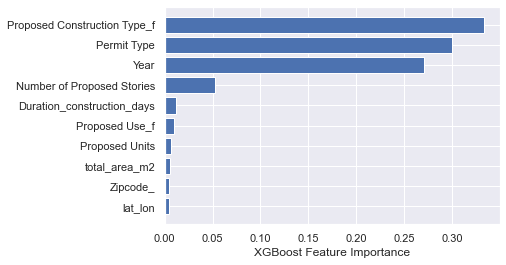

In [65]:
# plot feature importance

model_xgb.feature_importances_
sorted_idx = model_xgb.feature_importances_.argsort()
model_xgb.feature_importances_[sorted_idx]
plt.barh(X.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

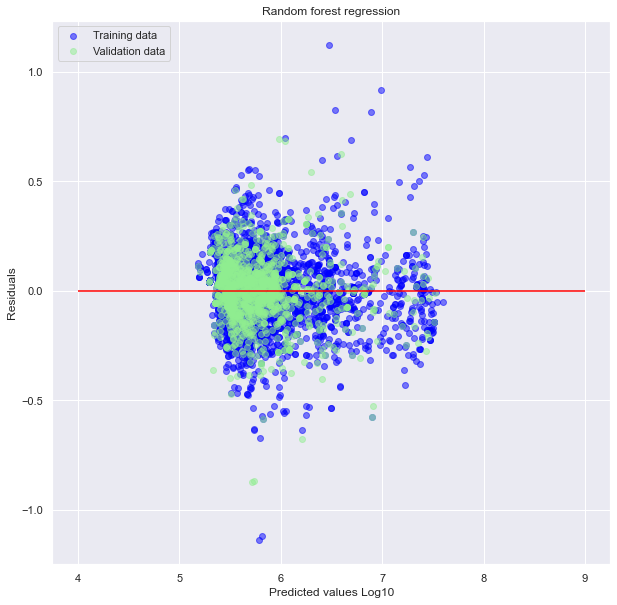

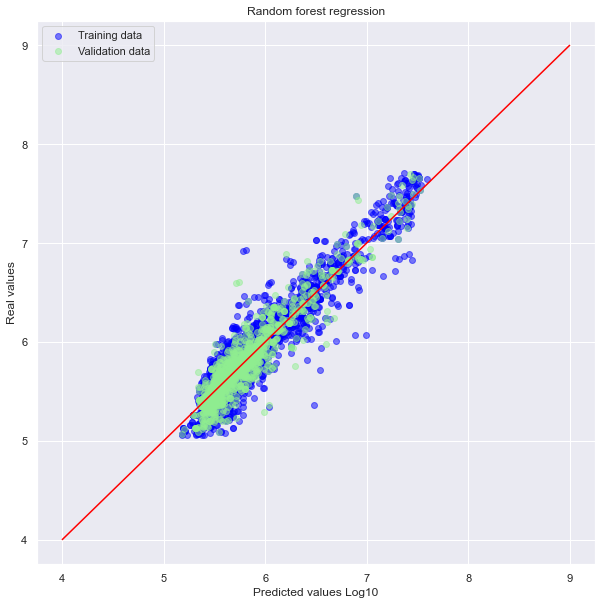

In [58]:
# Plot residuals
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, y_train_pred - Y_train, c = "blue", marker = "o", alpha=0.5, label = "Training data")
plt.scatter(y_test_pred, y_test_pred - Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 4, xmax = 9, color = "red")
plt.show()

# Plot predictions
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "o", alpha=0.5,  label = "Training data")
plt.scatter(y_test_pred, Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([4, 9], [4, 9], c = "red")
plt.show()

In [44]:
print("Preprocessing X...")
print()
X = preprocessor.fit_transform(X)
print("...Done!")


Preprocessing X...

...Done!


In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0.4, 
                             learning_rate=0.1, max_depth=25, 
                             min_child_weight=1.5, n_estimators=400,
                             reg_alpha=1.2, reg_lambda=1.1,
                             subsample=0.7, silent=1,
                             random_state =0, nthread = -1)

randomForestRegressor = RandomForestRegressor(n_estimators=200, max_depth=100, min_samples_leaf=1, min_samples_split=4, random_state=0)


In [53]:
description_ML = "dataset V8 | result XGBoost and RandomForestRegressor | Baptiste"#add why you do this experiment

#Validation function
n_folds = 4
random_state = 0

#R2

def R2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X)
    R2= cross_val_score(model, X, Y, scoring="r2", cv = kf)
    return(R2)

#sqrt of negative mean squared error
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#sqrt of negative mean squred log error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X)
    rmsle= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_log_error", cv = kf))
    return(rmsle)

#Mean absolute percentage error*
def mape_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X)
    mape= -cross_val_score(model, X, Y, scoring="neg_mean_absolute_percentage_error", cv = kf)
    return(mape)

#explained_variance_score 
def evs_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X)
    evs= cross_val_score(model, X, Y, scoring="explained_variance", cv = kf)
    return(evs)

In [54]:
models = [
          model_xgb,
          #model_lgb,
          randomForestRegressor
          ]

model_names = [
               "\nXGBoost\n",
               #"\nLGBM model\n",
               "\nRandom Forest Regressor"
               ]

In [55]:
count = 0
for model in models :
  print(model_names[count])
  score_1 = R2_cv(model)
  print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))

  score_2 = rmse_cv(model)
  print("\nRoot mean squared error - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))

  score_3 = rmsle_cv(model)
  print("\nRMSLE -logarithmic error - mean : {:.4f}  |  std : {:.4f}\n".format(score_3.mean(), score_3.std()))

  score_4 = mape_cv(model)
  print("\nMean absolute percentage error - mean : {:.2f}  |  std : {:.2f}\n".format(score_4.mean(), score_4.std()))

  score_5 = evs_cv(model)
  print("\nExplained variance score - mean : {:.4f}  |  std : {:.4f}\n".format(score_5.mean(), score_5.std()))
  print("----------------END--------------------")
  count = count + 1
  execfile('../src/score_ML.py') #!python fichier.py ou %run fichier.py ne recuperrent pas des variables locales


XGBoost

[12:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could 

In [61]:
#fit the final model

randomForestRegressor.fit(X,Y)

RandomForestRegressor(max_depth=100, min_samples_split=4, n_estimators=200,
                      random_state=0)

In [62]:
# Save Model Using joblib


# save the model to disk
filename_model = 'finalmodel.jolib'
joblib.dump(randomForestRegressor, filename_model)

#save preprocessor to disk
filename_preprocessor = 'finalprepro.jolib'
joblib.dump(preprocessor, filename_preprocessor)

 
# some time later...
 
# load the model from disk
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

['finalprepro.jolib']

In [63]:
# load the model from disk
loaded_model = joblib.load('finalmodel.jolib')
result = loaded_model.score(X, Y)
print(result)

0.9851773947910737
